(8807, 12)
Index(['show_id', 'type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')
show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64


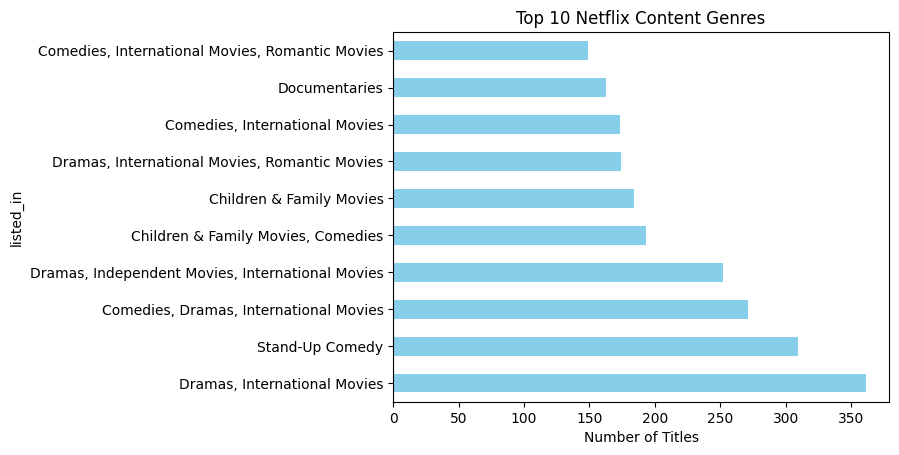

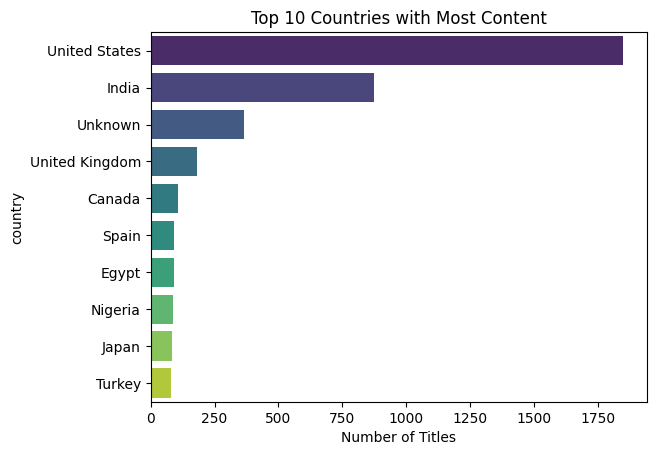

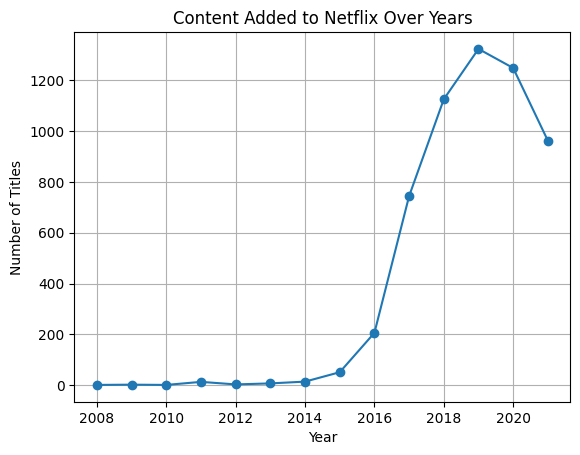

In [8]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

df = pd.read_csv('netflix_titles.csv')

print(df.shape)
print(df.columns)
df.head()

print(df.isnull().sum())

df['country'] = df['country'].fillna('Unknown')
df['rating'] = df['rating'].fillna('Not Rated')
df.dropna(subset=['director', 'cast'], inplace=True)

df['listed_in'].value_counts().head(10).plot(kind='barh', color='skyblue')
plt.title("Top 10 Netflix Content Genres")
plt.xlabel("Number of Titles")
plt.show()

country_counts = df['country'].value_counts().head(10)

country_df = pd.DataFrame({
    'country': country_counts.index,
    'count': country_counts.values
})
sns.barplot(data=country_df, y='country', x='count', hue='country', palette='viridis', dodge=False, legend=False)
plt.title("Top 10 Countries with Most Content")
plt.xlabel("Number of Titles")
plt.show()

df['date_added'] = pd.to_datetime(df['date_added'].str.strip(), errors='coerce')
df['year_added'] = df['date_added'].dt.year

df['year_added'].value_counts().sort_index().plot(kind='line', marker='o')
plt.title("Content Added to Netflix Over Years")
plt.xlabel("Year")
plt.ylabel("Number of Titles")
plt.grid(True)
plt.show()
